# Denzel Washington Movies IMDb - EDA

# Análise sobre produções em que o Denzel Washington participou de alguma maneira(atuando, dirigndo, dublando, etc) com dados extraídos no IMDb. 

#### OBS: Não me responsabilizo pela veracidade das informações encontradas. Esta é apenas uma forma de mostrar uma análise de dados com um assunto do meu interesse. O próprio ator disse há um tempo atrás que uma ou outra informação precisa ser alterada no site do IMDb: https://heavy.com/entertainment/2013/08/2-guns-interview-denzel-mark-wahlberg/

In [1]:
#Bibliotecas para fazer a Análise dos Dados
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Algumas questões que podem ser respondidas com esta análise...
#### 1) Em quantas produções o ator trabalhou? <br> 1.1)Total da carreira<br> 1.2) Produções por ano<br> 1.3) Produções por década<br>
#### 2) Qual foi o diretor com quem ele mais trabalhou na carreira?<br> 2.1) Quais foram os Filmes que o Denzel fez com esses diretores?<br> 2.2) Quantos e quais foram os filmes que ele simultaneamente atuou e dirigiu?<br>
#### 3) O gênero de seus filmes mudou conforme os anos de carreira?<br> 3.1) Gênero por Quantidade<br> 3.2) Gênero por Década<br>
#### 4) Duração dos Filmes<br> 4.1) Filmes mais longos<br> 4.2) Filmes mais curtos<br>
#### 5) Produções melhor e pior avaliadas (pela nota do Metacritic (METASCORE) e do IMDB)<br> 5.1) Avaliação individual(IMDb e METASCORE)<br> 5.2) Comparação entre as 2 avaliações<br> 5.3) Avaliação IMDb por gênero <br> 5.4) Avaliação Metacritic por gênero 
#### 6) Nuvens de palavras <br> 6.1) Nuvem de palavras com as sinopses das produções <br> 6.2) Nuvem de palavras com os Títulos das produções
 

In [7]:
#Pegando arquivo .csv 
df = pd.read_csv('filmes_denzel.csv',sep=';', encoding='ISO-8859-1')

In [8]:
df.head(4)

,Titulo,Ano,Genero,Duracao,Diretor,Roteirista,Nota IMDB,Qtd Rev IMDB,Nota Metascore,Qtd Rev Metascore,Sinopse,Link
0,O Protetor 2,2018,Action,121,Antoine Fuqua,Richard Wenk,7.2,1233,49,30,\r\n Robert McCall serves a...,http://www.imdb.com/title/tt3766354/?ref_=nm_f...
1,"Roman J. Israel, Esq.",2017,Crime,122,Dan Gilroy,Dan Gilroy,6.4,16787,58,133,"\r\n Roman J. Israel, Esq.,...",http://www.imdb.com/title/tt6000478/?ref_=nm_f...
2,Um Limite Entre Nos,2016,Drama,139,Denzel Washington,August Wilson,7.2,76603,79,301,\r\n A working-class Africa...,http://www.imdb.com/title/tt2671706/?ref_=nm_f...
3,Sete Homens e um Destino,2016,Action,132,Antoine Fuqua,Akira Kurosawa,6.9,155032,54,395,\r\n Seven gunmen in the ol...,http://www.imdb.com/title/tt2404435/?ref_=nm_f...


In [4]:
#df.shape

In [5]:
#df.isnull().any()

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Em quantas produções o ator trabalhou?

 Nesse dataset extraído do IMDb, peguei as produções onde ele foi creditado como ator e diretor em filmes, séries e animações.<br>
 OBS: Foram desconsideradas aparições como ele mesmo em qualquer produção(incluindo documentários).

## 1.1) Total de Produções

In [10]:
df.shape[0]

56

Pelos dados extraídos, o ator foi creditado até o momento em 56 produções, seja atuando, dirigindo ou fazendo ambos em filmes e/ou séries, sendo ou não o ator principal.

## 1.2) Produções por Ano

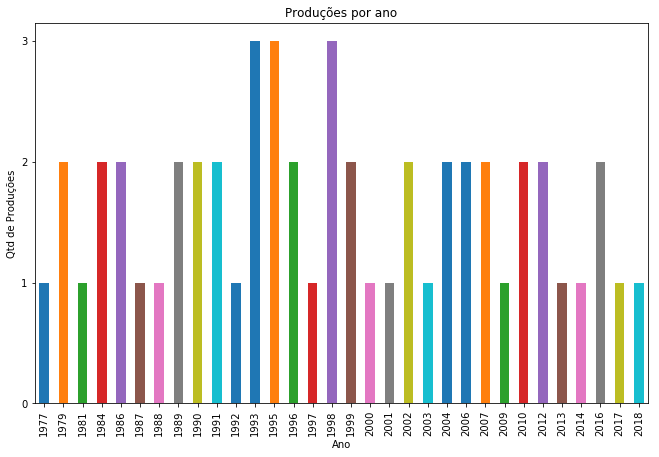

In [11]:
#Excluindo anos sem informação
dfGraphAno = df['Ano'] 
dfGraphAno = dfGraphAno[dfGraphAno != 0]
dfGraphAno = dfGraphAno.sort_values(ascending=True)

plt.rcParams['figure.figsize'] = (11,7)
plt.figure();
plt.title('Produções por ano')
plt.ylabel('Qtd de Produções')
plt.yticks(range(0,len(dfGraphAno)))
plt.xlabel('Ano')
    
dfGraphAno.value_counts().sort_index(ascending=True).plot(kind='bar');

Podemos ver que nos anos em que o ator participou de alguma produção, o range de filmes variou de 1 a 3 filmes.<br>
Baseado nisso, os anos em que ele mais participou de produções foram: 1993, 1995 e 1998.

## 1.3) Produções Por Década

In [12]:
#Função para definir a década, baseada no ano
def pegaDecada(ano):
    if ano >= 1970 and ano < 1980:
        decada = 1970
    elif ano >= 1980 and ano < 1990:
        decada = 1980
    elif ano >= 1990 and ano < 2000:
        decada = 1990
    elif ano >= 2000 and ano < 2010:
        decada = 2000
    elif ano >= 2010 and ano < 2020:
        decada = 2010
    elif ano >= 2020 and ano < 2030:
        decada = 2020
    else: 
        decada = 0
        
    return decada    

#x = pegaDecada(1985)
#x

In [13]:
#Criando coluna de década no Dataframe
qtdProd = df.shape[0]
listDecada = []

for i in range(qtdProd):
    x = pegaDecada(df['Ano'][i])
    listDecada.append(x)
    #print (x)

df['Decada'] = listDecada
#df

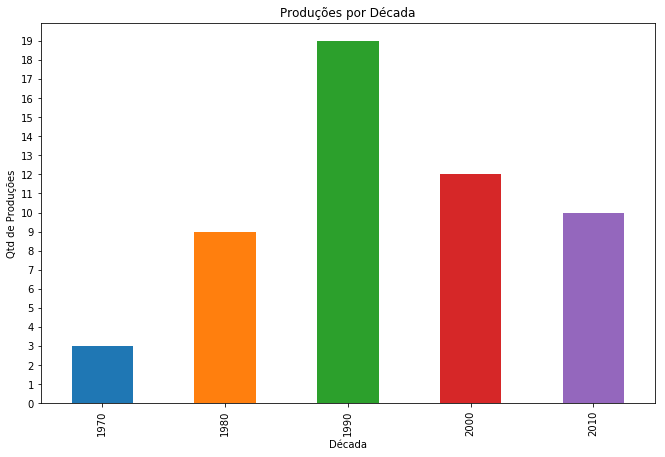

In [14]:
#Excluindo anos sem informação
dfGraphDec = df['Decada'] 
dfGraphDec = dfGraphDec[dfGraphDec != 0]
dfGraphDec = dfGraphDec.sort_values(ascending=True)

plt.rcParams['figure.figsize'] = (11,7)
plt.figure();
plt.title('Produções por Década')
plt.ylabel('Qtd de Produções')
plt.yticks(range(0,len(dfGraphDec)))
plt.xlabel('Década')
    
dfGraphDec.value_counts().sort_index().plot(kind='bar');

In [15]:
#dfGraphDec.value_counts()

Pelos dados, o número de participações do Denzel em produções é consistente desde a década de 1980.<br>
Claramente podemos ver que a década de 1990 foi a que ele teve o maior número de participações, com 19, seguido pela década de 2000, com 12 e, fechando o TOP 3, a de 2010, com 10 participações.<br> 
A década de 1980 só não entrou no TOP 3 por conta de apenas uma participação de diferença com relação a década de 2010 (foram 9).<br> 
Considerando que a década de 2010 ainda não acabou, é possível que o número de participações dessa década ainda empate ou ultrapasse a década de 2000. Vamos aguardar para ver...

## 2) Qual foi o diretor com quem ele mais trabalhou na carreira?

In [16]:
#Criando a categoria de 'Outros' para diretor, baseado na qtd de filmes trabalhados(<=2)
dfDiretor = df 
dfDiretor.loc[dfDiretor['Diretor'].isin((dfDiretor['Diretor'].value_counts()[dfDiretor['Diretor'].value_counts() < 2]).index), 'Diretor'] = 'Outros'
#dfDiretor
#df

In [17]:
#Excluindo os diretores com menos de 2 filmes na contagem
dfGraphDir = dfDiretor[dfDiretor['Diretor'] != 'Outros']
dfGraphDir = dfGraphDir[dfGraphDir['Diretor'].notnull()]

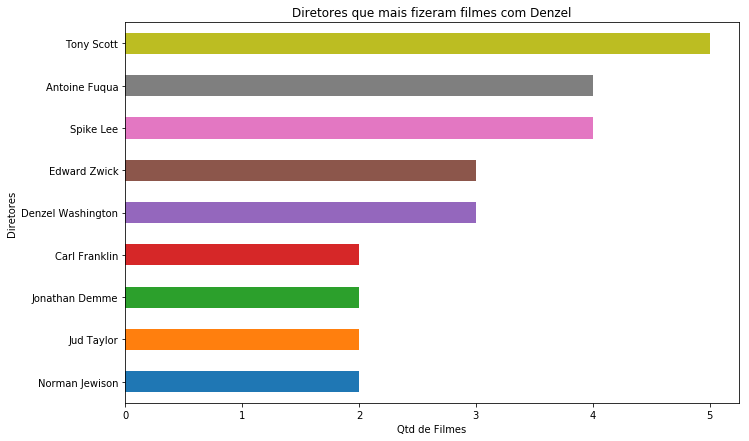

In [18]:
#Grafico com diretores que trabalharam com Denzel
plt.rcParams['figure.figsize'] = (11,7)
plt.figure();
plt.title('Diretores que mais fizeram filmes com Denzel')
plt.xlabel('Qtd de Filmes')
plt.ylabel('Diretores')
dfGraphDir['Diretor'].value_counts(ascending=True).plot(kind='barh');

O falecido diretor Tony Scott lidera a lista com 5 filmes, seguido de Antoine Fuqua e Spike Lee(com 4 filmes cada), seguido do próprio Denzel e Edward Zwick(com 3 filmes cada). Com dois filmes, Carl Franklin, Jud Taylor, Norman Jewison e Jonathan Demme.

## 2.1) Quais foram os Filmes que o Denzel fez com esses diretores?

In [19]:
#Listagem de filmes/diretor
dfGraphDir[['Diretor','Titulo','Ano']].sort_values(['Diretor','Ano'], ascending=[False, False])

,Diretor,Titulo,Ano
8,Tony Scott,Incontrolavel,2010
10,Tony Scott,O Sequestro do Metro 123,2009
13,Tony Scott,Deja Vu,2006
16,Tony Scott,Chamas da Vinganca,2004
33,Tony Scott,Mare Vermelha,1995
14,Spike Lee,O Plano Perfeito,2006
25,Spike Lee,Jogada Decisiva,1998
37,Spike Lee,Malcolm X,1992
41,Spike Lee,Mais e Melhores Blues,1990
22,Norman Jewison,"Hurricane, o Furacao",1999


## 2.2) Quantos e quais foram os filmes que ele simultaneamente atuou e dirigiu?

In [20]:
#Filmes em que ele atuou e dirigiu
dfDirDenz = dfGraphDir[dfGraphDir['Diretor'] == 'Denzel Washington']
dfDirDenz[['Diretor','Titulo','Ano']].sort_values(['Diretor','Ano'], ascending=[False, False])

,Diretor,Titulo,Ano
2,Denzel Washington,Um Limite Entre Nos,2016
11,Denzel Washington,O Grande Debate,2007
18,Denzel Washington,Voltando a Viver,2002


A Resposta já aparecia na pergunta anterior, mas aqui fiz com o foco somente no Denzel como ator/diretor.<br> Como os dados extraídos já mostram que ele foi creditado como ator nas produções, bastou fazer uma seleção onde ele aparece como diretor.<br> Como podemos ver, ele até o momento foi ator e diretor em 3 produções.  

## 3) O gênero de seus filmes mudou conforme os anos de carreira?

In [21]:
dfGraphGen = df
dfGraphGen = dfGraphGen[dfGraphGen['Ano'] != 0]
#dfGraphGen

## 3.1) Gênero por Quantidade

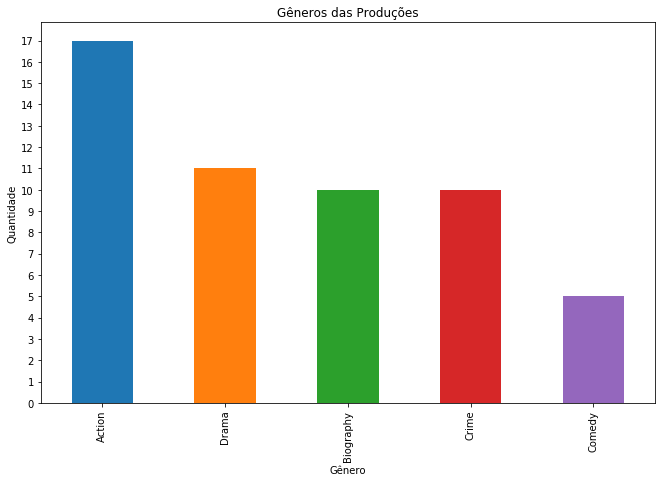

In [22]:
#Generos mais comuns dos filmes
#Grafico com os Generos de filmes que o Denzel mais trabalhou. Considerando apenas o primeiro gênero identificado para o filme em questão...
plt.rcParams['figure.figsize'] = (11,7)
plt.figure();
plt.title('Gêneros das Produções')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.yticks(range(0,len(dfGraphGen)))
dfGraphGen['Genero'].value_counts(ascending=False).plot(kind='bar');

## 3.2) Gênero por Década

In [23]:
#dfGraphGen

In [24]:
#Gerando tabela cruzada(somente com gênero e década) para criar o grafico
tabGenDec = pd.crosstab(index=dfGraphGen['Decada'], columns=dfGraphGen['Genero'])
#tabGenDec

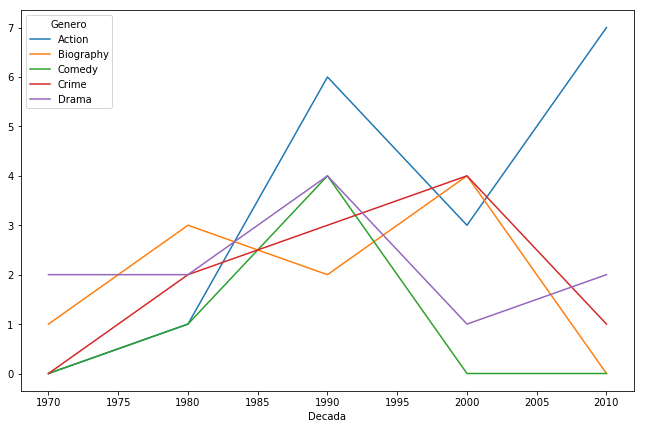

In [25]:
#Gerando o gráfico...
tabGenDec.plot(kind="line",figsize=(11,7),stacked=False)

<b>Ação:</b> Como já visto no gráfico anterior, o ator participou de produções em sua maioria no gênero de ação. O crescimento em participações desse gênero iniciou a partir dos anos 1980-1990, teve uma queda nos anos 2000 e retomou o crescimento na década atual.<br> <b>Comédia:</b> as participações em produções de comédia tiveram seu auge na década de 1990 e desde a década de 2000 suas participações nesse gênero são praticamente inexistentes.<br> <b>Biografias:</b> Já o gênero de biografias teve seu auge nos anos 2000 e depois só caiu nas décadas seguintes.<br> <b>Crime:</b> as participações em produções desse gênero tiveram seu auge nas décadas de 1990 e 2000 e depois só diminuíram.<br> <b>Drama:</b> As participações tiveram seu auge na década de 1990 e diminuiu na década seguinte. Na década atual retomou o crescimento. 
 


## 4) Duração dos Filmes

### Quais foram os filmes mais longos e mais curtos que o Denzel participou???

## 4.1) Filmes mais longos

In [26]:
#TOP 3 Filmes mais longos
dfDurFilm = dfGraphDir[dfGraphDir['Duracao'] != 0]
dfDurFilm[['Titulo','Duracao']].sort_values(by='Duracao', ascending=False).head(3)

,Titulo,Duracao
54,Flesh & Blood,240
37,Malcolm X,202
16,Chamas da Vinganca,146


## 4.2) Filmes mais curtos

In [27]:
#TOP 3 Filmes mais curtos
dfDurFilm[['Titulo','Duracao']].sort_values(by='Duracao', ascending=True).head(3)

,Titulo,Duracao
51,License to Kill,96
8,Incontrolavel,98
50,A Historia de um Soldado,101


## 5) Produções melhor e pior avaliadas (pela nota do metacritic e do IMDB)

## 5.1) Avaliação individual(IMDb e Metacritic)

In [28]:
#TOP 10 maiores notas IMDB
#df.sort_values(by='Nota IMDB', ascending=False)
dfGraphDir[['Titulo','Nota IMDB']].sort_values(by='Nota IMDB', ascending=False).head(10)

,Titulo,Nota IMDB
43,Tempo de Gloria,7.9
20,Dia de Treinamento,7.7
37,Malcolm X,7.7
35,Filadelfia,7.7
16,Chamas da Vinganca,7.7
11,O Grande Debate,7.6
14,O Plano Perfeito,7.6
22,"Hurricane, o Furacao",7.6
18,Voltando a Viver,7.3
33,Mare Vermelha,7.3


In [29]:
#TOP 10 menores notas IMDb
dfGraphDir[['Titulo','Nota IMDB']].sort_values(by='Nota IMDB', ascending=True).head(10)

,Titulo,Nota IMDB
51,License to Kill,5.5
24,Nova York Sitiada,6.3
10,O Sequestro do Metro 123,6.4
54,Flesh & Blood,6.5
17,Por um Triz,6.5
41,Mais e Melhores Blues,6.6
30,Coragem sob Fogo,6.6
15,Sob o Dominio do Mal,6.6
31,O Diabo Veste Azul,6.7
8,Incontrolavel,6.8


In [30]:
#TOP 10 maiores notas MetaScore
dfGraphDir[['Titulo','Nota Metascore']].sort_values(by='Nota Metascore', ascending=False).head(10)

,Titulo,Nota Metascore
2,Um Limite Entre Nos,79
31,O Diabo Veste Azul,78
30,Coragem sob Fogo,77
14,O Plano Perfeito,76
15,Sob o Dominio do Mal,76
22,"Hurricane, o Furacao",74
37,Malcolm X,72
20,Dia de Treinamento,69
8,Incontrolavel,69
35,Filadelfia,66


In [31]:
dfNotas1 = dfGraphDir[dfGraphDir['Nota Metascore'] != 0]
dfNotas1[['Titulo','Nota Metascore']].sort_values(by='Nota Metascore', ascending=True).head(10)

,Titulo,Nota Metascore
16,Chamas da Vinganca,47
0,O Protetor 2,49
24,Nova York Sitiada,53
3,Sete Homens e um Destino,54
10,O Sequestro do Metro 123,55
4,O Protetor,57
13,Deja Vu,59
18,Voltando a Viver,62
25,Jogada Decisiva,63
17,Por um Triz,63


In [32]:
#dfGraphGen
#Colocando as notas na mesma escala...
dfGraphGen['Nota METASCORE'] = dfGraphGen['Nota Metascore']/10

In [33]:
#Mantendo somente os filmes com avaliações nos dois lugares...
dfNotas = dfGraphGen[['Titulo','Nota IMDB','Nota METASCORE']]
dfNotas2 = dfNotas[dfNotas['Nota METASCORE'] != 0]
#dfNotas2

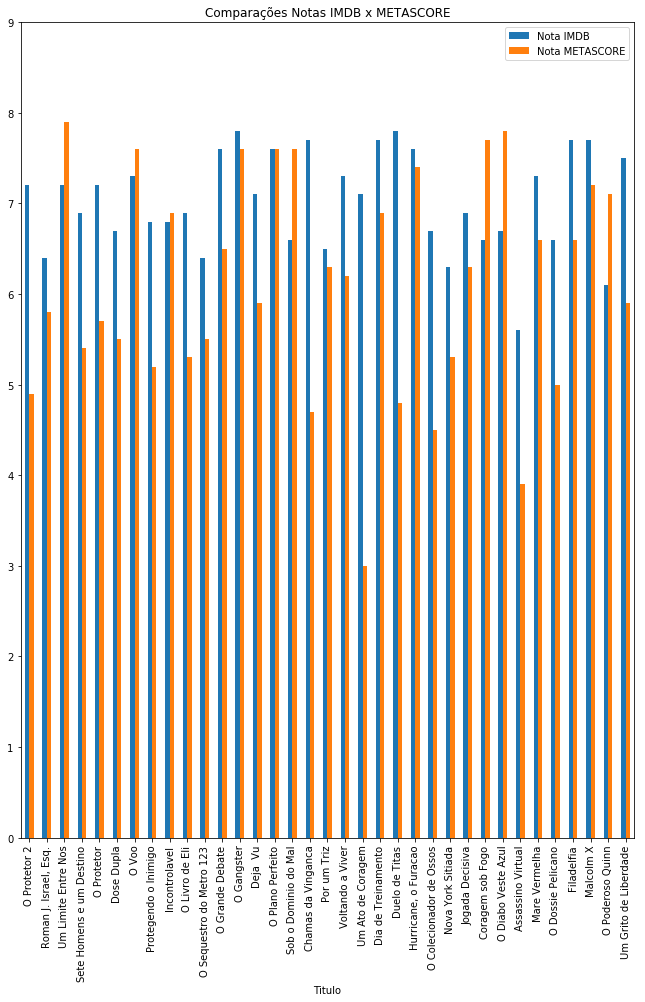

In [75]:
dfNotas2.plot(x=dfNotas2['Titulo'],  kind='bar', figsize=(11,15),
              title='Comparações Notas IMDB x METASCORE', yticks=(range(0,10)),
              stacked=False);

## 5.3) Avaliação IMDb por gênero

In [61]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

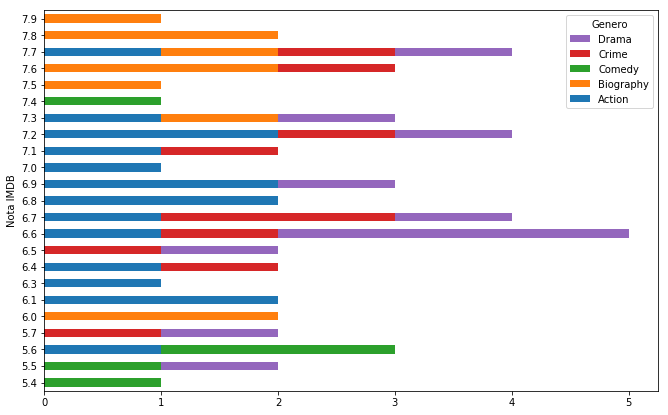

In [70]:
#Gerando tabela cruzada(somente com gênero e nota IMDb) para criar o grafico
tabGenIMDb = pd.crosstab(index=dfGraphGen['Nota IMDB'], columns=dfGraphGen['Genero'])
#tabGenIMDb
#Gerando o gráfico...
tabGenIMDb.plot(kind="barh",figsize=(11,7), legend='reverse',  stacked=True)

## 5.4) Avaliação Metacritic por gênero 

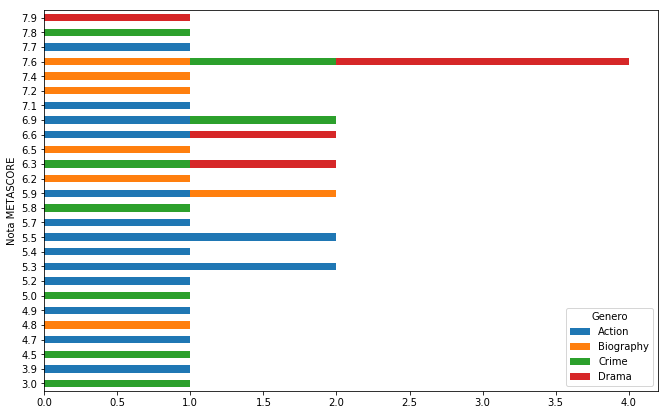

In [77]:
#Gerando tabela cruzada(somente com gênero e nota metascore) para criar o grafico
dfx = dfGraphGen[dfGraphGen['Nota METASCORE'] != 0]
tabGenIMDb = pd.crosstab(index=dfx['Nota METASCORE'], columns=dfx['Genero'])
#tabGenIMDb
#Gerando o gráfico...
tabGenIMDb.plot(kind="barh",figsize=(11,7), stacked=True)

## 6) Nuvens de palavras ¶

Criando nuvens de palavras relacionadas as sinopses e aos títulos das produções

## 6.1) Nuvem de palavras com as sinopses das produções

In [1]:
#Bibliotecas
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from os import path

In [4]:
#Lendo as sinopses do dataframe e criando uma só string para todas as sinopses
sinopses = str(df['Sinopse'])
#sinopses

In [20]:
#Definindo a lista de stopwords
stopwords= set(STOPWORDS)

#Adicionando a lista stopwords em português
new_words = []
with open("stopwords_portuguese.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)

In [21]:
def printWordCloud(x):
    plt.figure(figsize=(20,10))
    wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='black', 
               mode="RGB",
               width=2000, 
               height=1000,
               stopwords=new_stopwords,
               normalize_plurals= True).generate(x)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

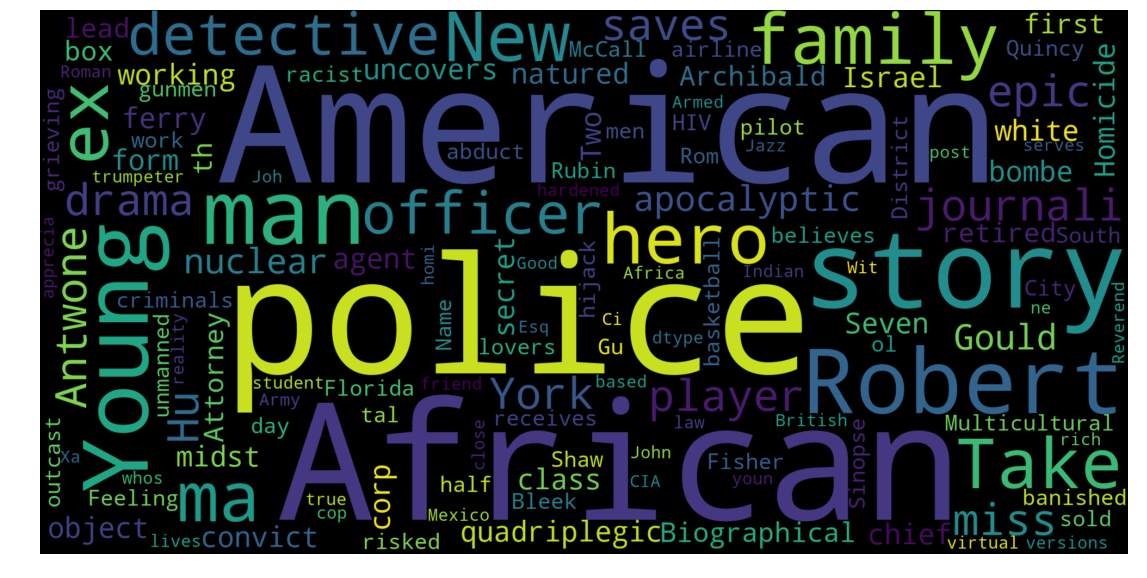

In [22]:
#Printando a wordcloud
printWordCloud(sinopses)

## 6.2) Nuvem de palavras com os Títulos das produções

In [14]:
titulo = str(df['Titulo'])
#titulo

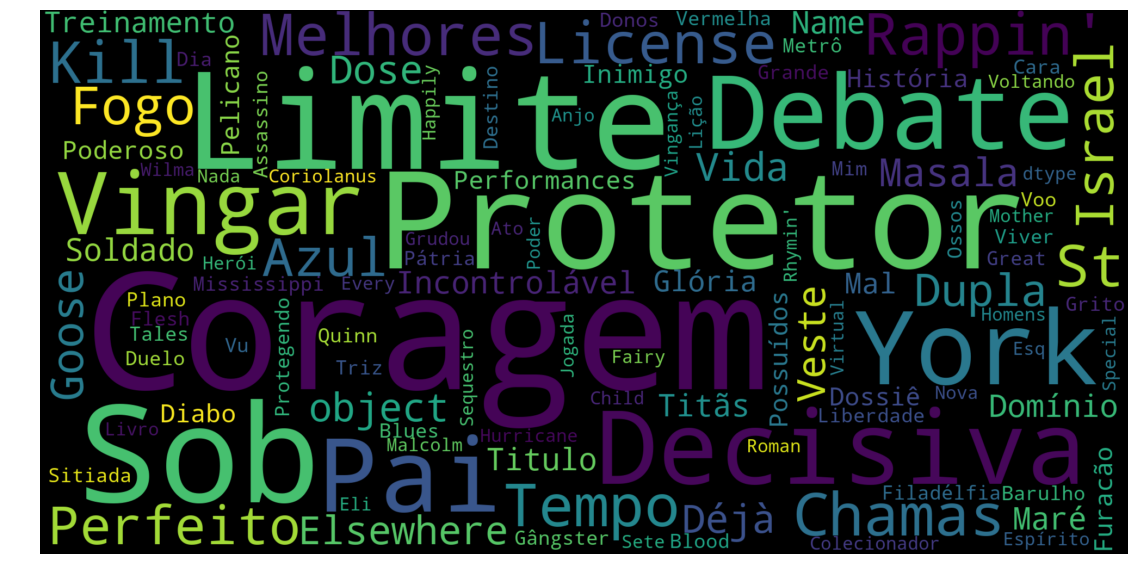

In [23]:
printWordCloud(titulo)